Помните вашего коллегу Василия — того, что прислал модель в pkl-формате и просил проверить её на ваших данных? Вот, кстати, и [ссылка на модель](https://lms-cdn.skillfactory.ru/assets/courseware/v1/edb336d23fdbf18a919f9dbfad55426a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/model.pkl).

Завтра Василию предстоит защищать решение перед руководителями проекта, а для этого нужно показать работающий прототип (в нашем случае — **задеплоить модель на тестовый сервер**) и рассказать об эффективности предлагаемого решения. За деплоем Василий обратился к вам.

С чего начнём?

+ Во-первых, нужно разобраться с тем, как происходит взаимодействие серверов по сети.
+ Во-вторых, необходимо узнать, как написать сервер и обернуть в него модель. Какие есть фреймворки? Какой выбрать конкретно в нашем случае? Как его реализовать?

# МОДЕЛИ СЕТЕВОГО ВЗАИМОДЕЙСТВИЯ

Начнём с первого вопроса и немного поговорим о том, как происходит взаимодействие между серверами по сети, то есть разберём процесс обмена информацией между компьютерами.

Наиболее известные модели сетевого взаимодействия — OSI и TCP/IP.

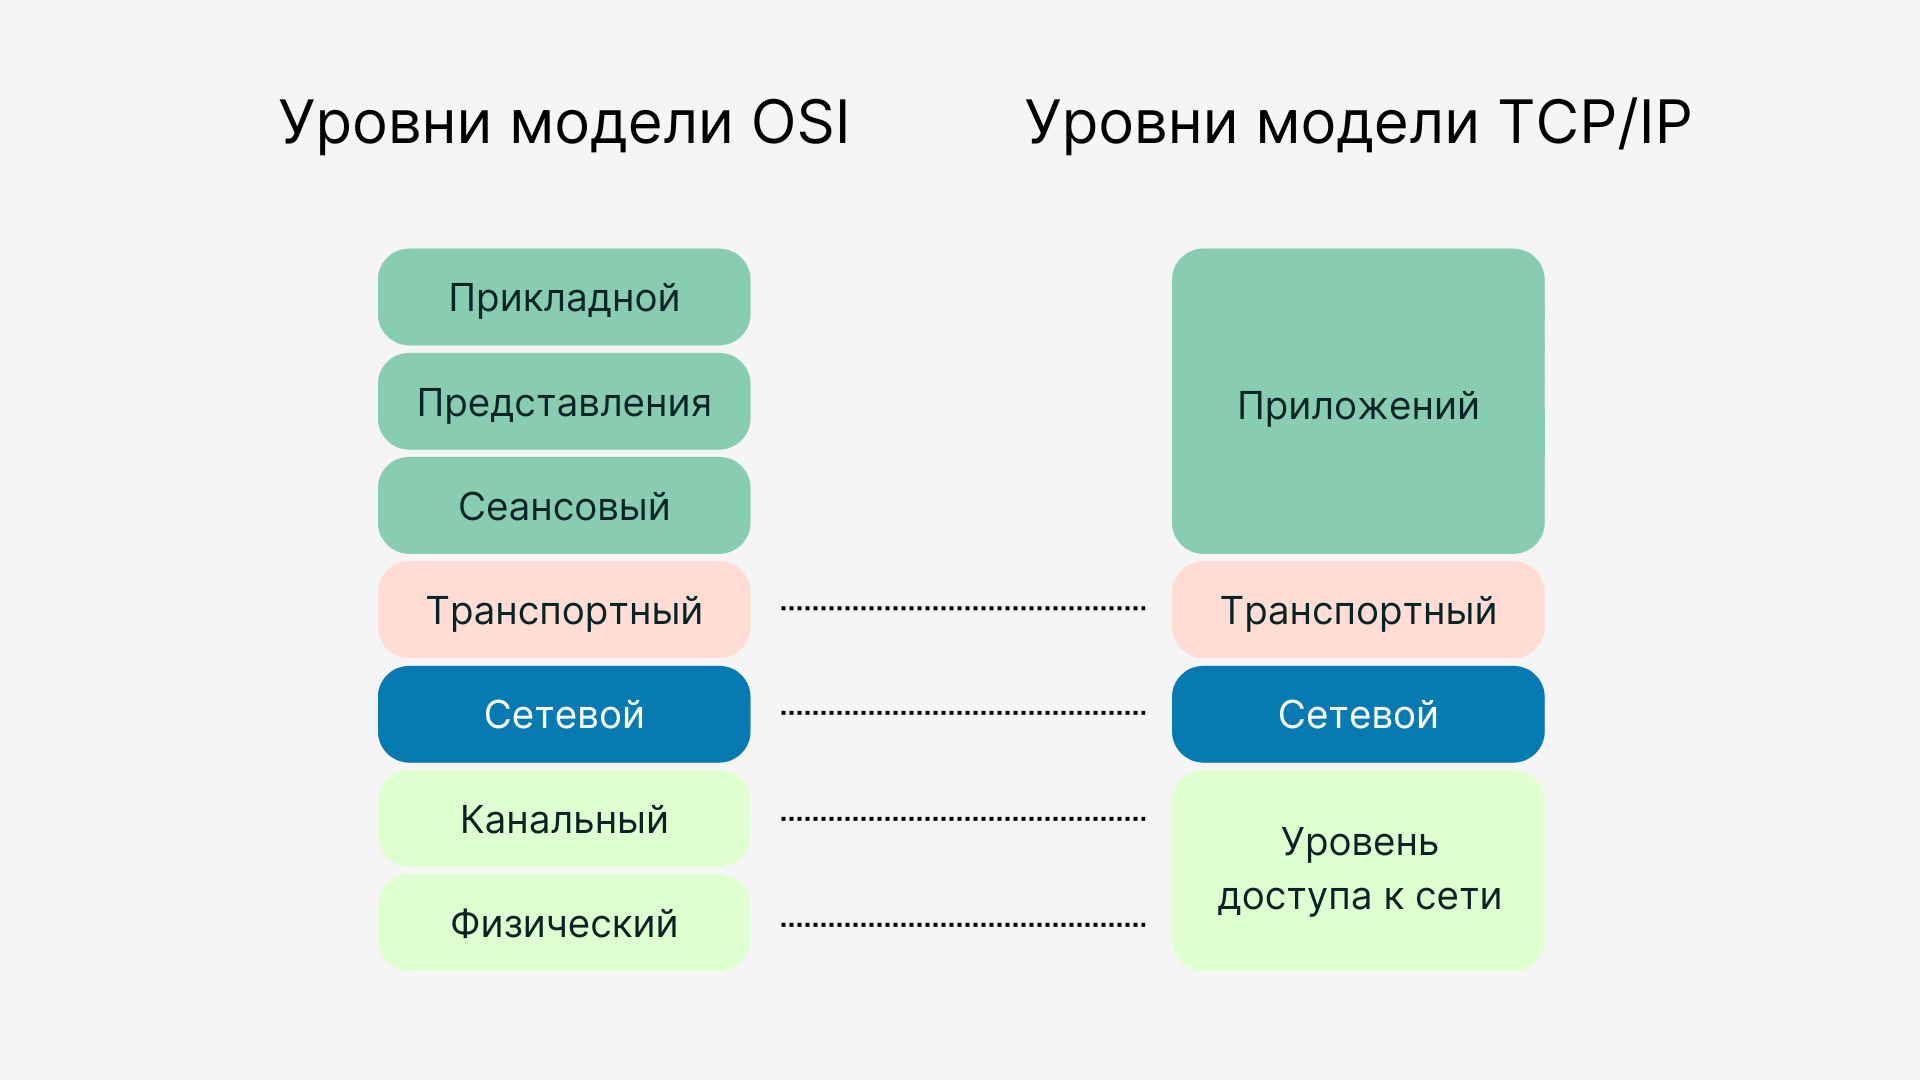

Эти модели распределяют сетевые протоколы по разным уровням взаимодействия. Что такое протокол?

### Вообще протокол — это некоторый набор правил, определяющий принципы взаимодействия устройств в сети. В нашем случае это правила, по которым программа, получив по сети набор битов, понимает, как его прочитать и что он значит.

Для того чтобы обмен информацией между устройствами проходил успешно, все устройства (участники процесса) должны следовать условиям протокола. В сети поддержка протоколов встраивается или в аппаратную (в «железо»), или в программную часть (в код системы), или в обе этих части. 

На схеме ниже представлены примеры протоколов, а также уровни их распределения в модели TCP/IP:

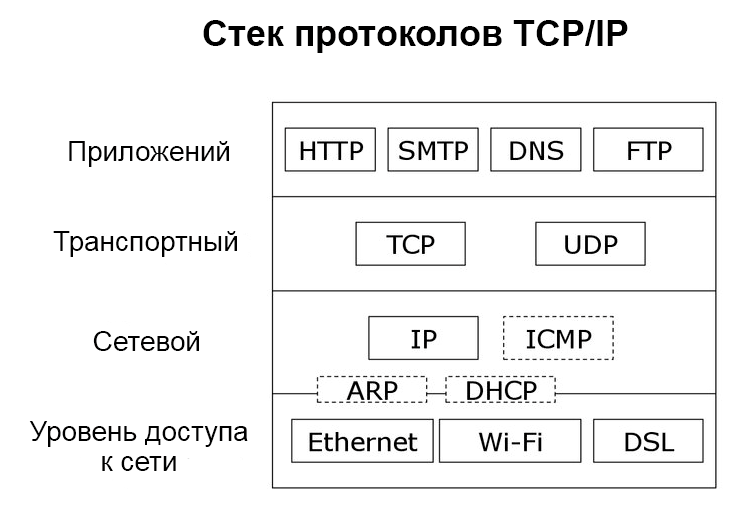

С другими протоколами и их назначением вы можете ознакомиться [здесь](https://selectel.ru/blog/network-protocols/).

В процессе сетевого взаимодействия участвуют как минимум два устройства — устройство-отправитель и устройство-получатель. Говоря простым языком, каждая из моделей сетевых взаимодействий устанавливает правила и регламенты по отправке сообщений между компьютерами.

Отправленное сообщение проходит все уровни, начиная от прикладного уровня приложений и заканчивая физическим уровнем доступа к сети. Когда сообщение доходит до адресата, оно также проходит все уровни в обратном порядке.

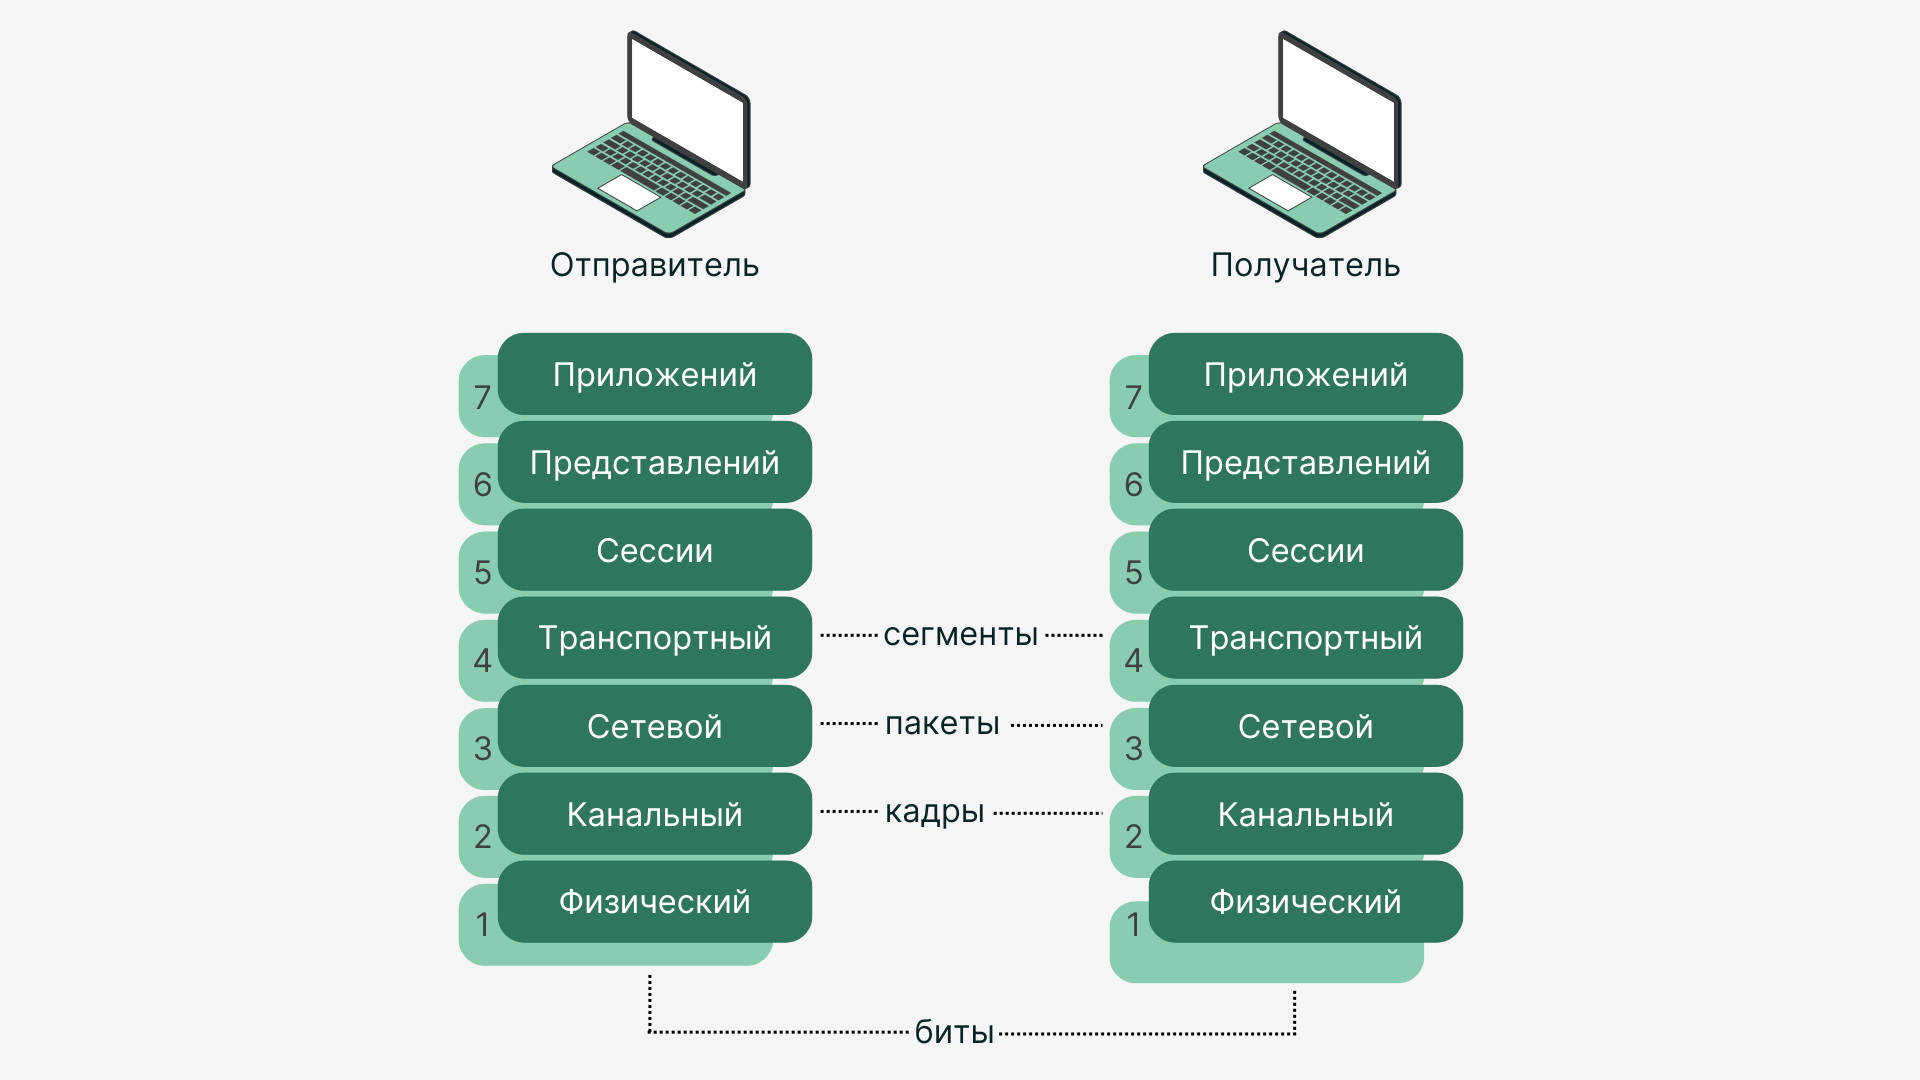

Если привести аналогию из жизни, можно сказать, что обе модели описывают правила, по которым мем, который вы отправляете другу в мессенджере, будет преобразован до битов данных, передаваемых по электрическим проводам, а затем будет восстановлен по этим же битам и отображён на экране устройства вашего друга.

Нам как дата-сайентистам не нужно знать все подробности того, как работают и чем отличаются друг от друга разные уровни взаимодействия. Однако для общего развития и понимания того, как устройства обмениваются информацией, вы можете прочитать об уровнях моделей OSI и TCP/IP [здесь](https://selectel.ru/blog/osi-for-beginners/) и [здесь](https://zametkinapolyah.ru/servera-i-protokoly/chto-takoe-model-osi-etalonnaya-model-setevogo-vzaimodejstviya-urovni-setevoj-modeli-osi-primery-i-prostoe-obyasneniya-principa-raboty-semiurovnevoj-modeli.html#__OSI-3).

Для наших целей (деплой модели в прод) достаточно уметь работать всего с тремя протоколами:

## **IP** — протокол сетевого уровня. Он определяет путь, по которому передаются данные.

## **TCP** — соответствует транспортному уровню, а значит, определяет, как передаются данные.

## **HTTP** — относится к прикладному уровню, описывающему взаимодействие приложений с сетью.

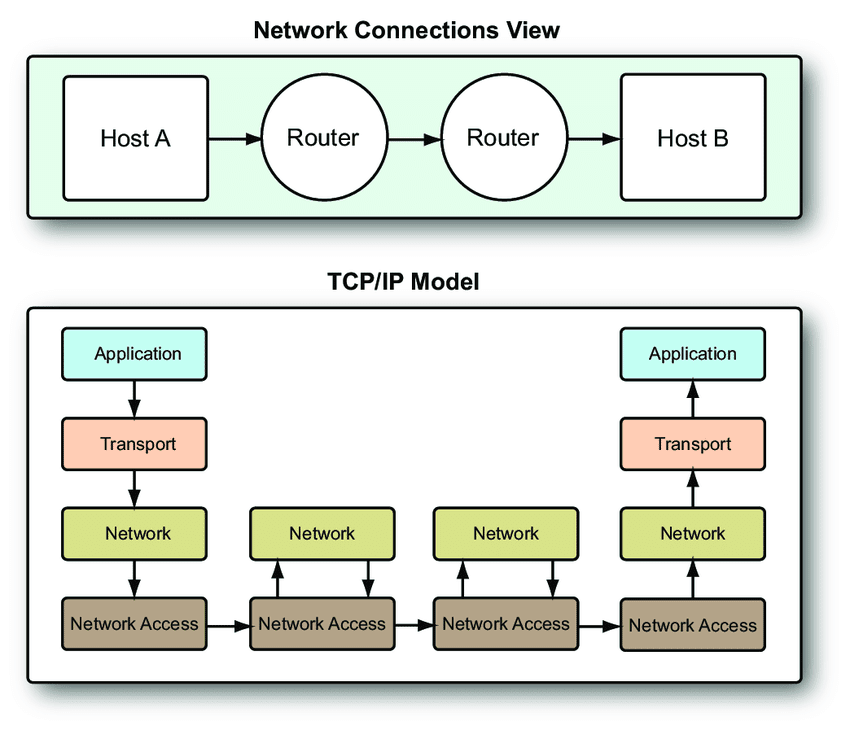

# IP

IP (Internet Protocol) — один из главных протоколов сетевого взаимодействия. Он отвечает за маршрутизацию трафика по сети, то есть определяет путь, по которому отправятся данные. Данные передаются пакетами (или датаграммами), которые формирует протокол IP.

### Важным свойством IP является отсутствие гарантированной доставки пакетов и их цельности: пакеты могут прийти в другой очерёдности (не в той, в которой их отправляли), прийти повреждёнными (тогда они уничтожаются) или вообще не прийти.

Путь, по которому отправятся данные, строится на основе IP-адресов.

## IP-адрес — это уникальный адрес, используемый для связи устройств внутри сети.

IP-адрес устроен довольно просто: чаще всего это четыре числа, разделённых точками (такой формат поддерживается в протоколе IPv4). Например, вот один из самых популярных IP-адресов — 192.168.0.1. Вы могли вводить его, чтобы зайти в настройки своего роутера.

Каждое из чисел в адресе — это восьмизначное двоичное число, или, правильнее говорить, октет. Оно может принимать значения от 0000 0000 до 1111 1111 в двоичной системе или от 0 до 255 — в десятичной системе счисления, то есть 256 разных значений.

Получается, что диапазон IP-адресов стартует с 0.0.0.0 и заканчивается 255.255.255.255. Если посчитать количество всех адресов в этом диапазоне, получится чуть больше четырёх миллиардов.

Уникальность IP-адреса может быть глобальной (в рамках всего интернета) или локальной (в рамках локальной подсети). Некоторые IP-адреса не являются общедоступными и зарезервированы для специальных целей, например диапазоны IP-адресов:

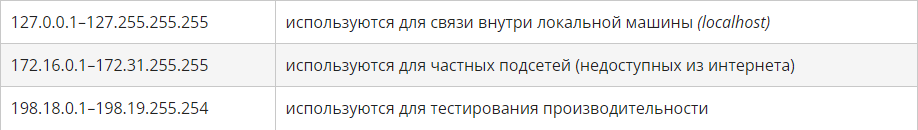

## **localhost** — зарезервированное доменное имя для IP-адресов из диапазона 127.0.0.1–127.255.255.255 (в сети из одного компьютера — для 127.0.0.1).

В компьютерной сети localhost относится к компьютеру, на котором запущена программа. Компьютер работает как виртуальный сервер. Тем самым создаётся так называемая «внутренняя петля»: обращаясь по IP-адресу localhost, вы, по сути, заставляете компьютер общаться с самим собой (хотя на самом деле внутри всё немного сложнее). Это нужно, например, для разработки и тестирования клиент-серверных приложений на одной машине (то есть и клиент, и сервер находятся на одном компьютере), что позволяет при разработке не использовать сетевое оборудование, дополнительные программные модули и тому подобное.

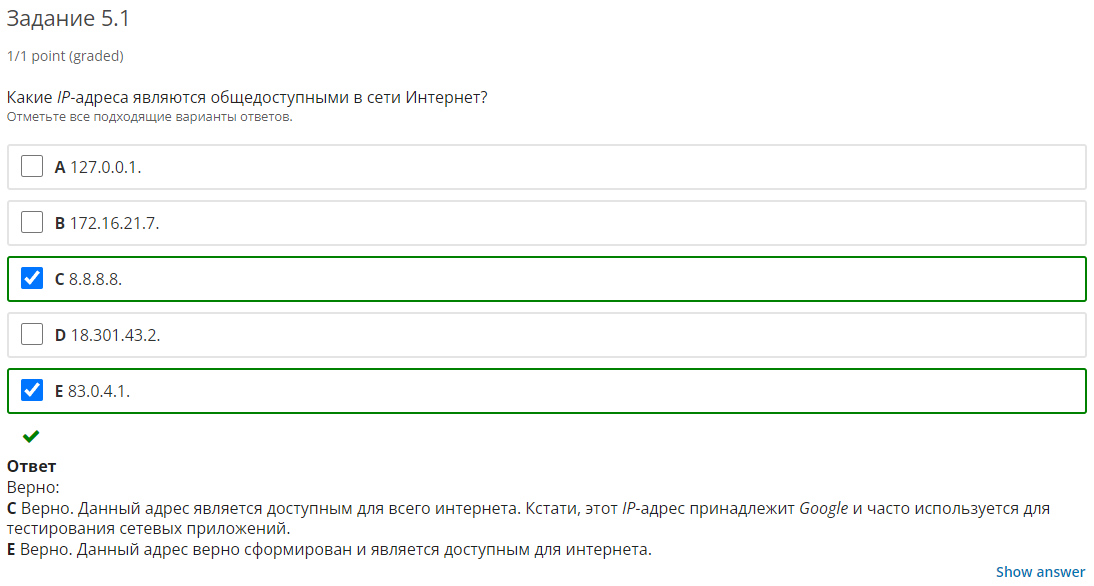

# TCP

TCP (Transmission Control Protocol) — протокол транспортного уровня. Он отвечает за управление передачей данных и гарантирует:

+ доставку пакетов (посылает пакеты повторно, если они не были доставлены);
+ последовательность и целостность доставки пакетов (используя нумерацию и контрольные суммы для проверки);
+ устраняет дубликаты в случае необходимости.

### Важной особенностью TCP является то, что перед отправкой данных он «устанавливает соединение» с получателем — обменивается управляющей информацией. После отправки пакетов источник ждёт подтверждения от получателя, что пакеты были доставлены.

Обычно на одном **узле сети** (сервере, компьютере) работают несколько приложений/процессов одновременно. Для идентификации приложения на источнике и получателе используется **порт**, который задаётся целым неотрицательным числом. Процесс или приложение могут зарезервировать у ОС определённый порт, например, для передачи данных по сети.

Порты разделяют на системные (0–1023), и пользовательские (1024–49151). Некоторые номера портов определены для конкретных приложений, например:

+ 22 — протокол SSH для безопасной передачи данных;
+ 25 — протокол SMTP для незащищённой передачи e-mail-сообщений;
+ 80 — протокол HTTP.

Например, если приложение доступно по адресу 172.16.0.11:8001, это значит следующее:

+ 172.16.0.11 — IP-адрес;
+ 8001 — TCP-порт, отведённый приложению.

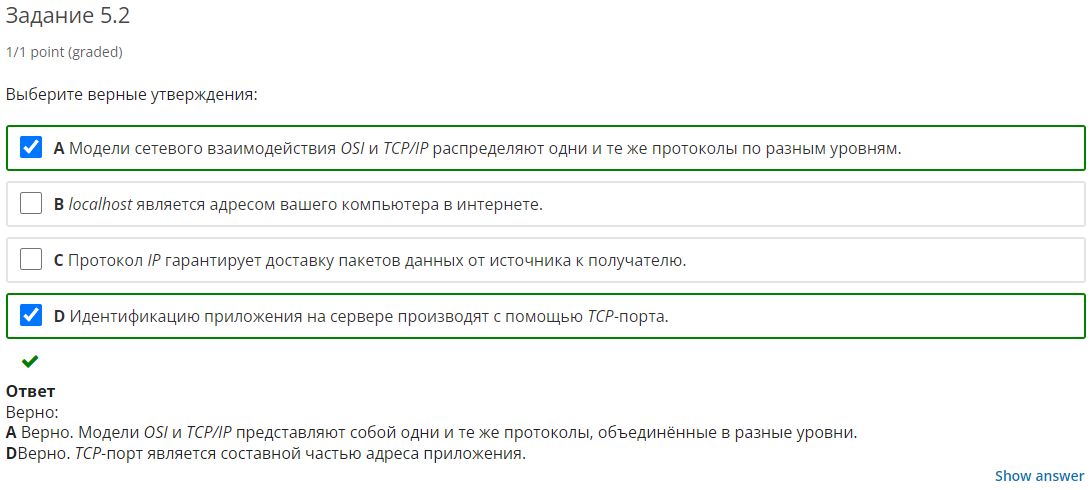

# HTTP

HTTP — это наиболее широко используемый протокол. Все сайты, на которые вы заходите, работают по этому протоколу. Он был разработан именно для передачи содержимого HTML-страниц в интернете, но впоследствии стал использоваться и для других целей. Например, HTTP применяется для налаживания взаимодействия между сервисами в сложных системах. Этим он нам и интересен.

Итак, HTTP — это протокол, который работает по принципу **клиент-сервер**.

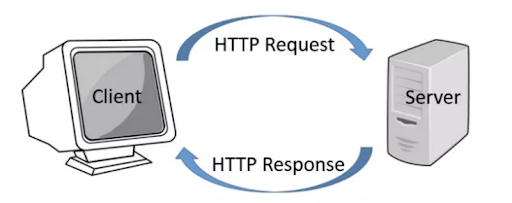

Это означает, что во взаимодействии участвует **две программы**, причём в разных ролях. Одна из них — **клиент**, или «заказчик услуг», формирует запрос и отправляет его к серверу. **Сервер**, или «поставщик услуг», получив запрос, обрабатывает его, формирует ответ и возвращает его клиенту.

# СТРУКТУРА HTTP-ЗАПРОСОВ

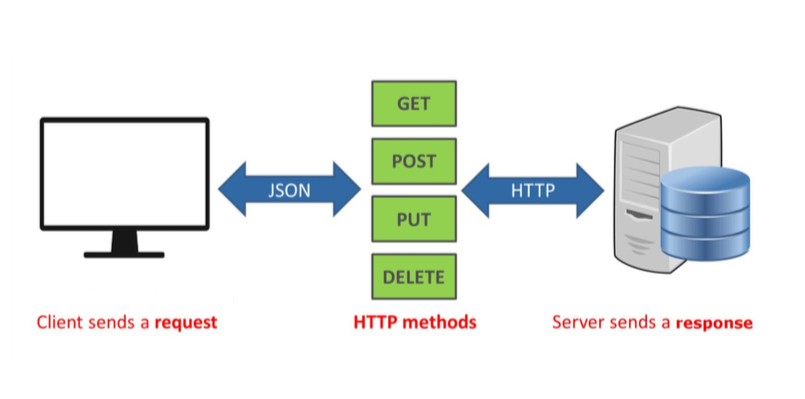

Запрос и ответ в HTTP являются строками, составленными в соответствии с протоколом.

Запрос состоит из трёх частей.

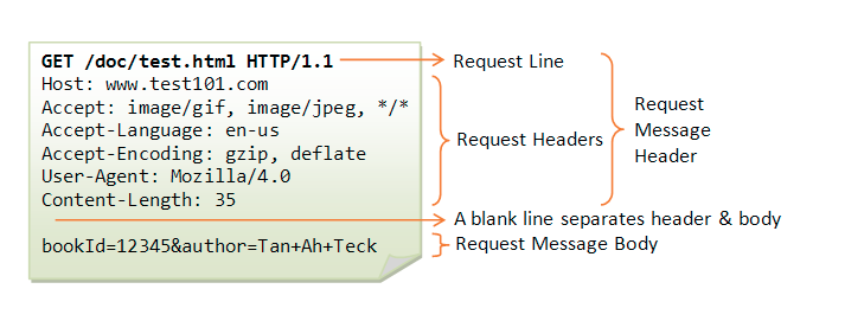

1. **Стартовая строка**, или Request Line — по ней определяется вид запроса.
2. **Заголовки запроса**, или Request Headers — дополнительные параметры запроса, в которых обычно передаётся служебная информация, например, в каком формате ожидается ответ или информация о клиенте.
3. **Тело запроса**, или Request Message Body — содержит данные для передачи. Эта часть присутствует не всегда.

Давайте чуть подробнее разберём первую часть.

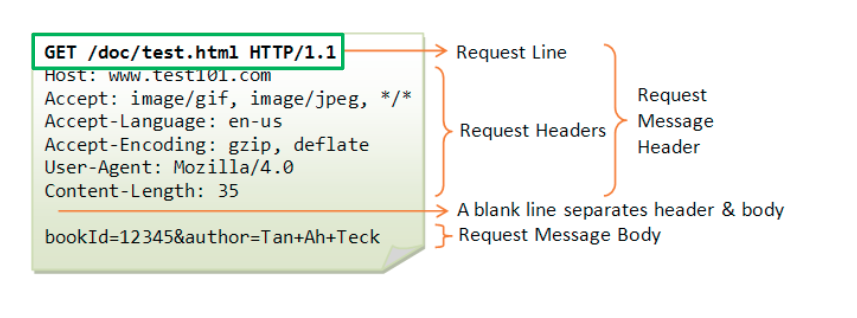

Первое, что указано в стартовой строке — это метод, или тип запроса. Есть набор стандартных методов, но теоретически вы можете создавать и свои.

**Основные методы:**

+ **GET** — обычно означает получение содержимого ресурса и не содержит тела.

Например, когда вы заходите в каталог интернет-магазина, вы получаете страницу с товарами — ваш браузер отправляет GET-запрос на сервер интернет-магазина.

+ **POST** — наоборот, передача данных ресурсу.

Например, когда вы заполняете форму авторизации на любом сайте и нажимаете кнопку для отправки своих данных, вы совершаете POST-запрос на сервер ресурса.

+ **PUT** — обновление ресурса.
+ **DELETE** — удаление ресурса.

В HTTP мы работаем с ресурсами, которые расположены по некоторому адресу на сервере. Изначально под ресурсами понимались HTML-файлы на сайте (вёрстка сайта), но сейчас это уже некоторое абстрактное понятие.

Адрес ресурса, или URI (Uniform Resource Identifier) — это то, что вы видите в адресной строке браузера. Он следует за методом в стартовой строке запроса.

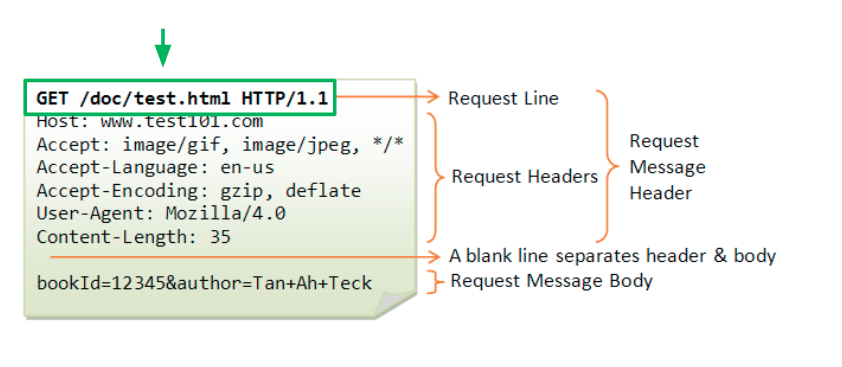

## Чем отличаются URI, URL и URN?

Для начала расшифруем аббревиатуры:

+ URI — Uniform Resource Identifier (унифицированный идентификатор ресурса);
+ URL — Uniform Resource Locator (унифицированный определитель местонахождения ресурса);
+ URN — Unifrorm Resource Name (унифицированное имя ресурса).

Большинство считает, что http://google.com или https://skillfactory.ru/ — это просто URL-адреса. Тем не менее, мы можем говорить о них как о URI. URI представляет собой комбинацию URL-адресов и URN. Таким образом, мы можем с уверенностью сказать, что все URL являются URI. Однако обратное неверно.

Давайте рассмотрим это на простом примере. 

*Имя «Джон Сноу» — это URN. Место, в котором живёт Джон, например «Улица Вестерос, 13» — это уже URL. Вас можно идентифицировать как уникальное лицо с вашим именем или вашим адресом. Эта уникальная личность — это уже URI. И хотя ваше имя может быть вашим уникальным идентификатором (URI), оно не может быть URL-адресом, поскольку имя не позволяет найти местоположение.*

### Теперь дадим расширенное определение терминам:

+ URI — имя и адрес ресурса в сети. URI включает в себя URL и URN.

Пример: https://wiki.merionet.ru/images/vse-chto-vam-nuzhno-znat-pro-devops/1.png

+ URL — адрес ресурса в сети. URL определяет местонахождение и способ обращения к нему. 

Пример: https://wiki.merionet.ru

+ URN — имя ресурса в сети. URN определяет только название ресурса, но не говорит, как к нему подключиться.

Пример: images/vse-chto-vam-nuzhno-znat-pro-devops/1.png

Последней идёт версия HTTP-протокола (кстати, последняя актуальная версия, 1.1, появилась ещё в 1999 году).

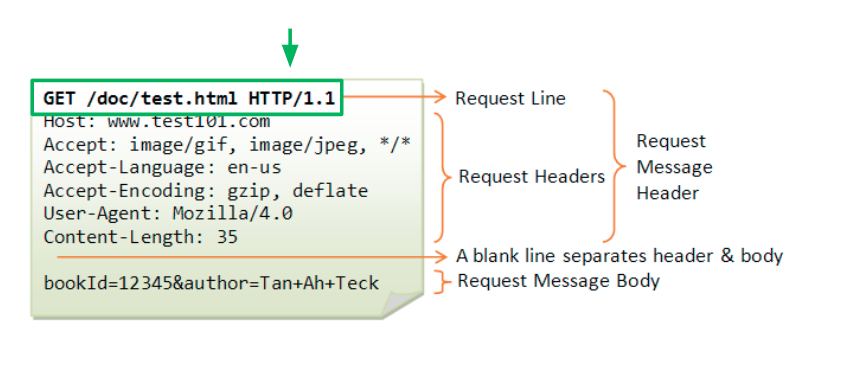

Ответ также состоит из стартовой строки, заголовков и тела.

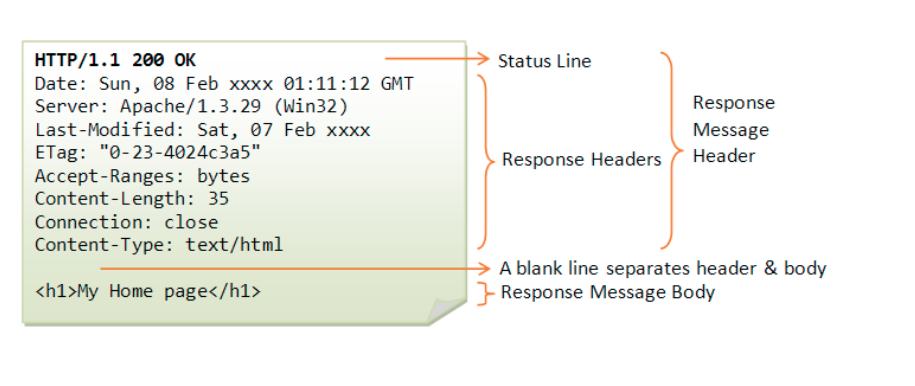

Основное отличие — в стартовой строке: там вместо метода и URI указывается код состояния. Это численное значение, которое показывает результат обработки. Коды задаются протоколом, и вы наверняка встречали «ошибку 404» на сайтах.

404 — это как раз код состояния, означающий, что ресурса с заданным URI не существует на сервере.

Группы кодов состояния ответа HTTP-сервера делятся на следующие группы:

+ информационные (100–199);
+ успешно (200–299);
+ перенаправление (300–399);
+ ошибка клиента (400–499);
+ ошибка сервера (500–599).

Примеры:

Код 200 означает, что запрос обработан успешно.

Код 500 означает, что сервер не смог обработать запрос.

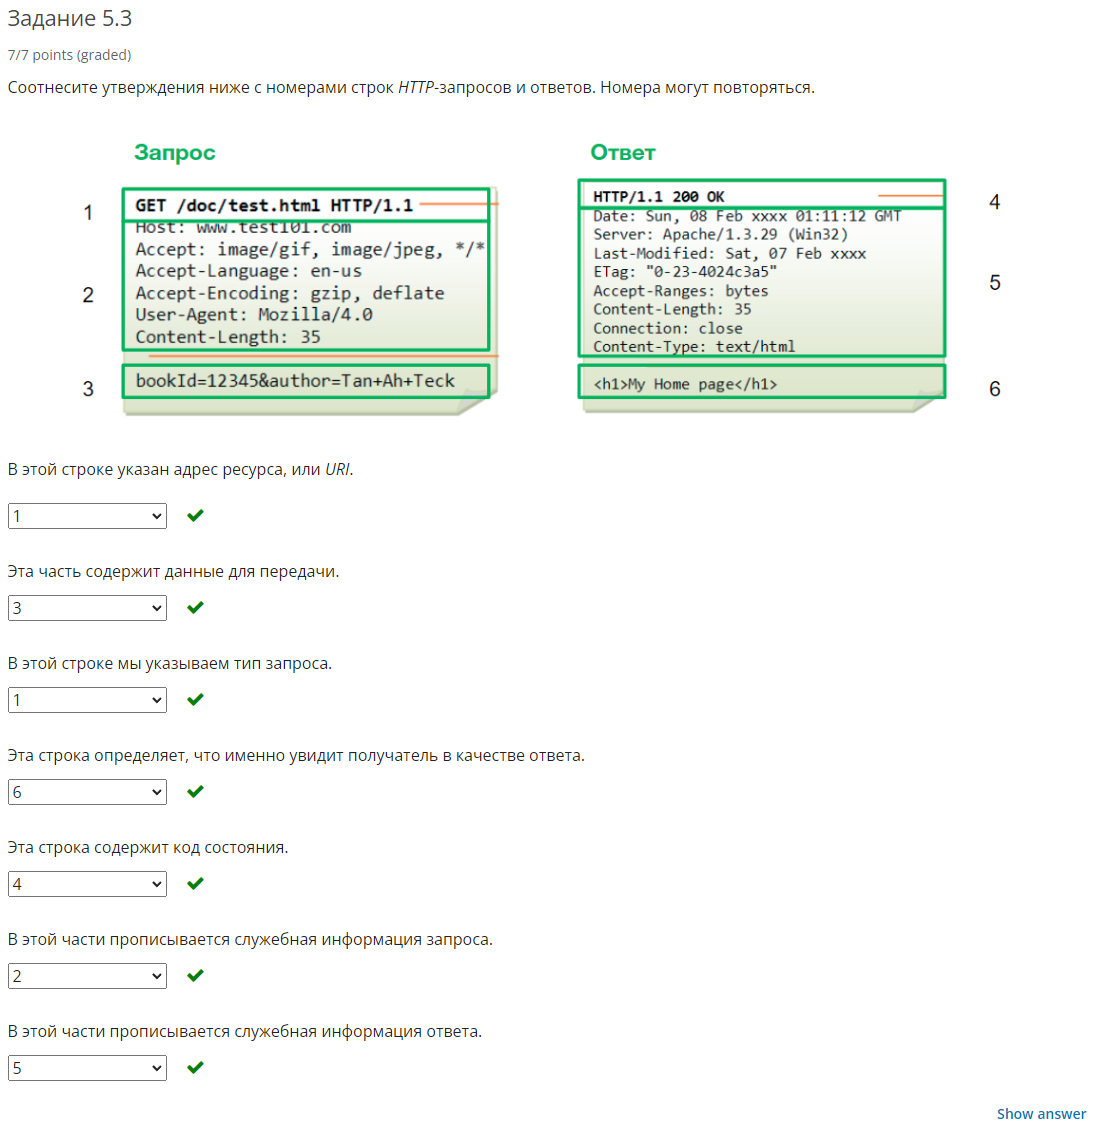

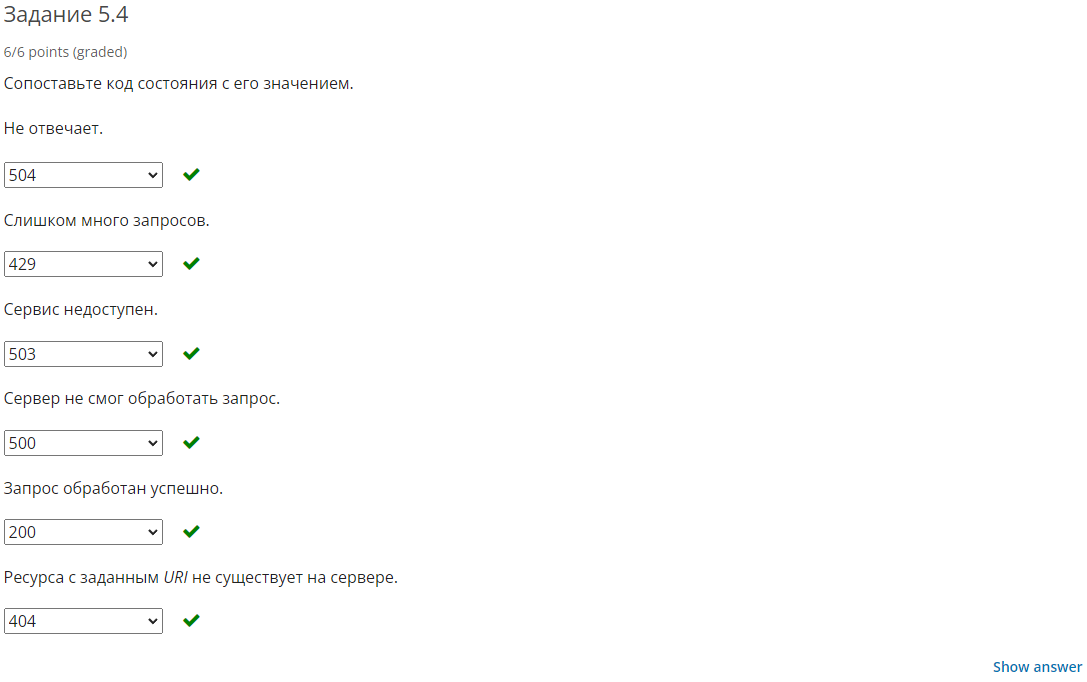

# REST (REPRESENTATIONAL STATE TRANSFER)

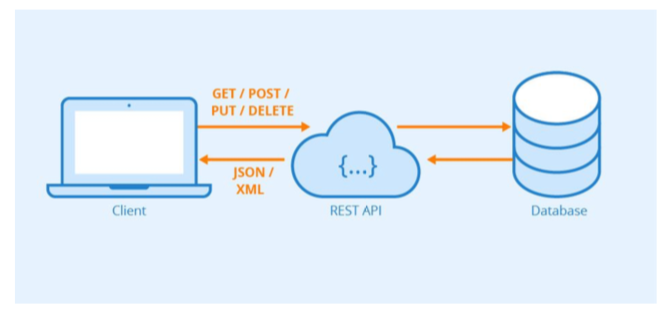



Cпецификация HTTP не обязывает сервер понимать все методы, а также не указывает серверу, что он должен делать при получении запроса с тем или иным методом. Поэтому был изобретён архитектурный стиль REST.

Он даёт более верхнеуровневые указания, чем HTTP-протокол, а именно:

+ как правильно организовывать адресацию к ресурсам;
+ какие методы у этих ресурсов должны быть;
+ какой ожидается результат.

Основная концепция философии REST заключается в том, что клиентом RESTful-сервера может быть что/кто угодно: браузер, другое приложение, разработчик. Веб-приложение, спроектированное по правилам REST, предоставляет информацию о себе в форме информации о своих ресурсах.

Ресурс может быть любым объектом, о котором сервер предоставляет информацию. Например, в API Instagram ресурсом может быть пользователь, фотография, хэштег. Каждая единица информации (ресурс) однозначно определяется URL.

+ GET-запрос /rest/users — получение информации обо всех пользователях.
+ GET-запрос /rest/users/125 — получение информации о пользователе с id=125.
+ POST-запрос /rest/users — добавление нового пользователя.
+ PUT-запрос /rest/users/125 — изменение информации о пользователе с id=125.
+ DELETE-запрос /rest/users/125 — удаление пользователя с id=125.

Поскольку спецификация REST является общепризнанной и широко распространённой, то следовать ей очень полезно.

### Если вы говорите, что ваш сервис RESTful (то есть построен по этой спецификации), то любой разработчик сразу поймёт, как примерно устроен сервис, а значит, сможет быстро начать им пользоваться: отправлять правильные запросы и получать тот результат, который ожидает.

# ПРОМЕЖУТОЧНЫЕ ИТОГИ

Для того чтобы наладить взаимодействие по HTTP, на стороне клиента вам необходимо сформировать запрос: указать адрес, куда отправится запрос, выбрать метод, а также задать заголовки и тело запроса, если это нужно для выбранного метода.

На стороне сервера при получении запроса необходимо знать, какой ресурс запрошен, чтобы понять, каким кодом его обрабатывать. Этот код, в зависимости от того, что он должен делать, может проверить значения заголовков и/или прочитать тело запроса.

Отлично, со взаимодействием сервисов по сети мы разобрались. Эти теоретические знания обязательно пригодятся вам для построения собственного веб-сервиса. Теперь пора приступать к рассмотрению Python-фреймворков, которые как раз и помогут создать этот веб-сервис.